# Sentiment Modeling

## Imports

In [1]:
import os
import gensim
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt 

from gensim.models import Word2Vec, FastText
from scipy.sparse import save_npz, load_npz

from sklearn.model_selection import train_test_split

import sys
sys.path.append("../")
from src.sentiment_modeling import * 
from src.feature_engineering import *
from src.utility import *
from src.models_and_metrics import MODELS, SCORING_METRICS, CV_STRATEGY, copy_models

## Loading Config

## Loading data

In [2]:
df = load_pickle("../data/interim/IMDB_feature_engineered.pkl")
df.head()

,review,sentiment,review_charecters_len,review_word_len,has_html,cleaned_review,tokens,cleaned_review_charecter_len,cleaned_review_word_len,cleaned_review_has_html,positive_tokens,negative_tokens,positive_tokens_len,negative_tokens_len
0,One of the other reviewers has mentioned that ...,1,1377,320,True,one reviewer mentioned watching oz episode hoo...,"[one, reviewer, mentioned, watching, oz, episo...",931,162,False,"[right, right, trust, regard, classic, appeal,...","[struck, brutality, faint, timid, punch, priso...",13,20
1,A wonderful little production. <br /><br />The...,1,793,166,True,wonderful little production filming technique ...,"[wonderful, little, production, filming, techn...",557,84,False,"[wonderful, comforting, well, seamless, well, ...",[terribly],11,1
2,I thought this was a wonderful way to spend ti...,1,721,172,True,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su...",495,83,False,"[wonderful, hot, witty, likable, well, impress...","[plot, simplistic, killer, disappointed, risk,...",11,6
3,Basically there's a family where a little boy ...,0,569,141,True,basically family little boy jake think zombie ...,"[basically, family, little, boy, jake, think, ...",362,62,False,"[like, well]","[zombie, slower, kill, ruin, meaningless, ignore]",2,6
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1032,236,True,petter matteis love time money visually stunni...,"[petter, matteis, love, time, money, visually,...",725,123,False,"[love, stunning, vivid, success, stylishly, so...","[loneliness, anxiously]",15,2


In [3]:
features = ["cleaned_review_charecter_len","cleaned_review_word_len","positive_tokens_len","negative_tokens_len"]
target = "sentiment"

In [4]:
countVectorized = load_npz("../data/interim/count_vectorized_reviwes.npz")
tfidfVectorized = load_npz("../data/interim/tfidf_vectorized_reviwes.npz")

In [5]:
countVectorized, tfidfVectorized

(<Compressed Sparse Row sparse matrix of dtype 'float32'
 	with 5044360 stored elements and shape (50000, 20000)>,
 <Compressed Sparse Row sparse matrix of dtype 'float32'
 	with 5044360 stored elements and shape (50000, 20000)>)

In [6]:
w2vVectorized = np.load("../data/interim/w2v_review_vecs.npy")
ftVectorized = np.load("../data/interim/ft_review_vecs.npy")

In [7]:
 w2vVectorized, ftVectorized

(array([[ 4.2732398e-05,  1.9302557e-04, -5.8641137e-05, ...,
         -8.2263170e-05,  1.1703277e-04,  1.8301233e-05],
        [ 5.2201816e-05,  2.7585472e-04, -3.4006036e-06, ...,
          2.5638103e-04,  3.5770788e-04,  5.7117966e-05],
        [ 1.2033064e-04,  4.1904690e-04,  6.5128232e-05, ...,
         -1.8050938e-04, -5.1984804e-05,  3.3234592e-04],
        ...,
        [ 1.7658886e-04, -4.0092540e-04, -2.8987983e-04, ...,
         -2.0702722e-04, -2.3320242e-04,  2.6683396e-05],
        [ 8.9120213e-06,  4.4251559e-05,  2.6783053e-04, ...,
          2.2672680e-04,  8.6163520e-05,  1.1480367e-04],
        [ 3.1963334e-04,  1.7563683e-04,  4.5814701e-05, ...,
          2.6755944e-07,  2.3819497e-04, -3.0530614e-04]],
       shape=(50000, 300), dtype=float32),
 array([[-6.6969544e-05,  1.2518477e-04, -4.2904787e-05, ...,
         -4.0195704e-05,  3.1100648e-05,  1.0234203e-04],
        [ 3.2393200e-05,  6.5292777e-05,  9.3015711e-05, ...,
          1.8614657e-05,  3.4350687e-05, 

## Splitting the data

In [8]:
test_size = 0.2

In [9]:
df_X = df[features]
y = df[target] 

In [10]:
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, y, test_size=test_size, stratify=y)

In [11]:
df_X_train.shape, df_X_test.shape, df_y_train.shape, df_y_test.shape

((40000, 4), (10000, 4), (40000,), (10000,))

In [12]:
count_X_train, count_X_test, count_y_train, count_y_test = train_test_split(countVectorized, y, test_size=test_size, stratify=y)

In [13]:
count_X_train.shape, count_X_test.shape, count_y_train.shape, count_y_test.shape

((40000, 20000), (10000, 20000), (40000,), (10000,))

In [14]:
tfidf_X_train, tfidf_X_test, tfidf_y_train, tfidf_y_test = train_test_split(tfidfVectorized, y, test_size=test_size, stratify=y)

In [15]:
tfidf_X_train.shape, tfidf_X_test.shape, tfidf_y_train.shape, tfidf_y_test.shape

((40000, 20000), (10000, 20000), (40000,), (10000,))

In [16]:
w2v_X_train, w2v_X_test, w2v_y_train, w2v_y_test = train_test_split(w2vVectorized, y, test_size=test_size, stratify=y)

In [17]:
w2v_X_train.shape, w2v_X_test.shape, w2v_y_train.shape, w2v_y_test.shape

((40000, 300), (10000, 300), (40000,), (10000,))

In [18]:
ft_X_train, ft_X_test, ft_y_train, ft_y_test = train_test_split(ftVectorized, y, test_size=test_size, stratify=y)

In [19]:
ft_X_train.shape, ft_X_test.shape, ft_y_train.shape, ft_y_test.shape

((40000, 300), (10000, 300), (40000,), (10000,))

## Models, scoring_metrics and cv_stragy

In [20]:
MODELS

{'LogisticRegression': LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42),
 'SGDClassifier': SGDClassifier(random_state=42),
 'LinearSVC': LinearSVC(max_iter=5000, random_state=42),
 'MultinomialNB': MultinomialNB(),
 'ComplementNB': ComplementNB(),
 'BernoulliNB': BernoulliNB(),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
 'RandomForestClassifier': RandomForestClassifier(n_jobs=-1, random_state=42),
 'ExtraTreesClassifier': ExtraTreesClassifier(n_jobs=-1, random_state=42),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
 'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
 'MLPClassifier': MLPClassifier(max_iter=300, random_state=42)}

In [21]:
SCORING_METRICS

['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [22]:
CV_STRATEGY

KFold(n_splits=5, random_state=42, shuffle=True)

## Traning models on Numeric cols in df

In [23]:
df_models, df_results = train_and_eval_models(
    data=(df_X_train, df_X_test, df_y_train, df_y_test),
    models= copy_models(MODELS, embedding_type='numerical_cols'),
    scoring_metrics=SCORING_METRICS
)
save_data_csv(df_results, "../results/metrics/df_results.csv")
save_pickle(df_models, "../models/df_models.pkl")

Evaluating LogisticRegression...
Evaluating SGDClassifier...
Evaluating LinearSVC...
Evaluating MultinomialNB...
Evaluating ComplementNB...
Evaluating BernoulliNB...
Evaluating DecisionTreeClassifier...
Evaluating RandomForestClassifier...
Evaluating ExtraTreesClassifier...
Evaluating GradientBoostingClassifier...
Evaluating AdaBoostClassifier...
Evaluating MLPClassifier...

Evaluation Complete.


In [24]:
df_results

,Model,Fit_Time_sec,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Train_Roc_auc,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_Roc_auc
0,LogisticRegression,2.544791,0.732625,0.732567,0.73275,0.732658,0.798310,0.7323,0.732812,0.7312,0.732005,0.798120
1,SGDClassifier,0.834376,0.681400,0.846051,0.44350,0.581945,0.792852,0.6819,0.848067,0.4432,0.582162,0.790612
2,LinearSVC,0.061386,0.732425,0.732716,0.73180,0.732258,0.798219,0.7322,0.732665,0.7312,0.731932,0.798095
3,MultinomialNB,0.009308,0.730150,0.720134,0.75290,0.736153,0.795954,0.7300,0.720475,0.7516,0.735709,0.794632
4,ComplementNB,0.010070,0.730150,0.720134,0.75290,0.736153,0.795954,0.7300,0.720475,0.7516,0.735709,0.794632
5,BernoulliNB,0.010977,0.524975,0.909091,0.05550,0.104613,0.531345,0.5259,0.903427,0.0580,0.109002,0.532608
6,DecisionTreeClassifier,0.221431,0.995725,0.999849,0.99160,0.995707,0.999963,0.6434,0.643803,0.6420,0.642900,0.643501
7,RandomForestClassifier,3.861250,0.995700,0.995849,0.99555,0.995699,0.999925,0.7046,0.711276,0.6888,0.699858,0.768989
8,ExtraTreesClassifier,2.380614,0.995725,0.999849,0.99160,0.995707,0.999963,0.6870,0.690972,0.6766,0.683711,0.750850
9,GradientBoostingClassifier,4.225819,0.738050,0.745564,0.72275,0.733980,0.814110,0.7305,0.738761,0.7132,0.725756,0.809496


In [25]:
df_cv_models, df_cv_results = train_and_eval_models(
    data=(df_X, y),
    models= copy_models(MODELS, embedding_type='numerical_cols'),
    scoring_metrics=SCORING_METRICS,
    cv_strategy=CV_STRATEGY
)
save_data_csv(df_cv_results, "../results/metrics/df_cv_results.csv")
save_pickle(df_cv_models, "../models/df_cv_models.pkl")

Evaluating LogisticRegression...
Evaluating SGDClassifier...
Evaluating LinearSVC...
Evaluating MultinomialNB...
Evaluating ComplementNB...
Evaluating BernoulliNB...
Evaluating DecisionTreeClassifier...
Evaluating RandomForestClassifier...
Evaluating ExtraTreesClassifier...
Evaluating GradientBoostingClassifier...
Evaluating AdaBoostClassifier...
Evaluating MLPClassifier...

Evaluation Complete.


In [26]:
df_cv_results

,Model,Fit_Time_sec,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Train_Roc_auc,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_Roc_auc
0,LogisticRegression,1.679061,0.732545,0.732417,0.732819,0.732617,0.798260,0.73246,0.732362,0.732677,0.732510,0.798222
1,SGDClassifier,9.132130,0.593880,0.841364,0.374739,0.379154,0.738908,0.59316,0.838210,0.373637,0.378377,0.739788
2,LinearSVC,0.757291,0.732500,0.732593,0.732299,0.732445,0.798173,0.73252,0.732694,0.732157,0.732415,0.798136
3,MultinomialNB,0.107765,0.730095,0.719869,0.753349,0.736228,0.795684,0.73026,0.720009,0.753555,0.736397,0.795664
4,ComplementNB,0.102322,0.730110,0.719894,0.753340,0.736237,0.795684,0.73020,0.719892,0.753634,0.736374,0.795664
5,BernoulliNB,0.133873,0.525160,0.907899,0.056000,0.105493,0.531598,0.52516,0.907715,0.056003,0.105494,0.531599
6,DecisionTreeClassifier,1.642517,0.995870,0.999849,0.991890,0.995853,0.999966,0.64368,0.644647,0.640351,0.642478,0.644536
7,RandomForestClassifier,60.868730,0.995835,0.995691,0.995980,0.995835,0.999936,0.70020,0.706522,0.684915,0.695545,0.768368
8,ExtraTreesClassifier,43.112238,0.995870,0.999849,0.991890,0.995853,0.999966,0.68470,0.689666,0.671675,0.680539,0.747424
9,GradientBoostingClassifier,32.647382,0.737190,0.745537,0.720205,0.732641,0.814038,0.73402,0.742305,0.717008,0.729416,0.808892


## Traning models on count vectors

In [27]:
count_models, count_results = train_and_eval_models(
    data=(count_X_train, count_X_test, count_y_train, count_y_test),
    models= copy_models(MODELS, embedding_type='count'),
    scoring_metrics=SCORING_METRICS
)
save_data_csv(count_results, "../results/metrics/count_results.csv")
save_pickle(count_models, "../models/count_models.pkl")

Evaluating LogisticRegression...
Evaluating SGDClassifier...
Evaluating LinearSVC...
Evaluating MultinomialNB...
Evaluating ComplementNB...
Evaluating BernoulliNB...
Evaluating DecisionTreeClassifier...
Evaluating RandomForestClassifier...
Evaluating ExtraTreesClassifier...
Evaluating GradientBoostingClassifier...
Evaluating AdaBoostClassifier...
Evaluating MLPClassifier...

Evaluation Complete.


In [28]:
count_results

,Model,Fit_Time_sec,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Train_Roc_auc,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_Roc_auc
0,LogisticRegression,4.762278,0.997125,0.997001,0.99725,0.997125,0.999914,0.8806,0.877130,0.8852,0.881147,0.946750
1,SGDClassifier,0.847814,0.992850,0.989570,0.99620,0.992874,0.999263,0.8727,0.856514,0.8954,0.875526,0.939348
2,LinearSVC,66.562298,1.000000,1.000000,1.00000,1.000000,1.000000,0.8625,0.859837,0.8662,0.863007,0.929749
3,MultinomialNB,0.044811,0.881450,0.878273,0.88565,0.881946,0.943652,0.8668,0.866507,0.8672,0.866853,0.930708
4,ComplementNB,0.044574,0.881450,0.878273,0.88565,0.881946,0.943652,0.8668,0.866507,0.8672,0.866853,0.930708
5,BernoulliNB,0.068854,0.885425,0.875896,0.89810,0.886859,0.949089,0.8679,0.862035,0.8760,0.868961,0.936672
6,DecisionTreeClassifier,108.110089,1.000000,1.000000,1.00000,1.000000,1.000000,0.7306,0.731340,0.7290,0.730168,0.730600
7,RandomForestClassifier,82.983788,1.000000,1.000000,1.00000,1.000000,1.000000,0.8556,0.859047,0.8508,0.854904,0.930741
8,ExtraTreesClassifier,113.979971,1.000000,1.000000,1.00000,1.000000,1.000000,0.8734,0.878241,0.8670,0.872585,0.943544
9,GradientBoostingClassifier,64.648670,0.815375,0.784262,0.87010,0.824954,0.903436,0.8110,0.778375,0.8696,0.821462,0.896415


In [29]:
count_cv_models, count_cv_results = train_and_eval_models(
    data=(countVectorized, y),
    models= copy_models(MODELS, embedding_type='count'),
    scoring_metrics=SCORING_METRICS,
    cv_strategy=CV_STRATEGY
)
save_data_csv(count_cv_results, "../results/metrics/count_cv_results.csv")
save_pickle(count_cv_models, "../models/count_cv_models.pkl")

Evaluating LogisticRegression...
Evaluating SGDClassifier...
Evaluating LinearSVC...
Evaluating MultinomialNB...
Evaluating ComplementNB...
Evaluating BernoulliNB...
Evaluating DecisionTreeClassifier...
Evaluating RandomForestClassifier...
Evaluating ExtraTreesClassifier...
Evaluating GradientBoostingClassifier...
Evaluating AdaBoostClassifier...
Evaluating MLPClassifier...

Evaluation Complete.


In [30]:
count_cv_results

,Model,Fit_Time_sec,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Train_Roc_auc,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_Roc_auc
0,LogisticRegression,47.847318,0.997285,0.996972,0.997600,0.997286,0.999918,0.88068,0.876848,0.885751,0.881275,0.946630
1,SGDClassifier,10.621294,0.993735,0.992973,0.994510,0.993740,0.999284,0.87286,0.869108,0.878050,0.873482,0.940316
2,LinearSVC,569.322501,1.000000,1.000000,1.000000,1.000000,1.000000,0.86024,0.858231,0.863026,0.860619,0.930234
3,MultinomialNB,0.839751,0.882090,0.879804,0.885101,0.882444,0.943761,0.86562,0.861990,0.870646,0.866288,0.929283
4,ComplementNB,0.819190,0.882110,0.879832,0.885111,0.882463,0.943760,0.86560,0.861985,0.870606,0.866266,0.929283
5,BernoulliNB,1.161840,0.885290,0.876901,0.896420,0.886552,0.949086,0.86934,0.860404,0.881777,0.870945,0.936033
6,DecisionTreeClassifier,799.256236,1.000000,1.000000,1.000000,1.000000,1.000000,0.72348,0.725979,0.717975,0.721933,0.723492
7,RandomForestClassifier,1484.568676,1.000000,1.000000,1.000000,1.000000,1.000000,0.85482,0.852778,0.857719,0.855235,0.929113
8,ExtraTreesClassifier,1997.196960,1.000000,1.000000,1.000000,1.000000,1.000000,0.87390,0.875839,0.871325,0.873568,0.943051
9,GradientBoostingClassifier,689.756461,0.815230,0.783477,0.871239,0.825029,0.903304,0.80762,0.776275,0.864404,0.817956,0.893153


## Traning models on tfidf vectors

In [31]:
tfidf_models, tfidf_results = train_and_eval_models(
    data=(tfidf_X_train, tfidf_X_test, tfidf_y_train, tfidf_y_test),
    models= copy_models(MODELS, embedding_type='tfidf'),
    scoring_metrics=SCORING_METRICS
)
save_data_csv(tfidf_results, "../results/metrics/tfidf_results.csv")
save_pickle(tfidf_models, "../models/tfidf_models.pkl")

Evaluating LogisticRegression...
Evaluating SGDClassifier...
Evaluating LinearSVC...
Evaluating MultinomialNB...
Evaluating ComplementNB...
Evaluating BernoulliNB...
Evaluating DecisionTreeClassifier...
Evaluating RandomForestClassifier...
Evaluating ExtraTreesClassifier...
Evaluating GradientBoostingClassifier...
Evaluating AdaBoostClassifier...
Evaluating MLPClassifier...

Evaluation Complete.


In [32]:
tfidf_results

,Model,Fit_Time_sec,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Train_Roc_auc,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_Roc_auc
0,LogisticRegression,0.971928,0.932200,0.925017,0.94065,0.932768,0.981532,0.9025,0.893143,0.9144,0.903647,0.963587
1,SGDClassifier,0.308895,0.926550,0.914488,0.94110,0.927603,0.978321,0.9005,0.886061,0.9192,0.902326,0.963340
2,LinearSVC,1.727978,0.981450,0.979627,0.98335,0.981485,0.998211,0.8954,0.888256,0.9046,0.896354,0.960017
3,MultinomialNB,0.046612,0.893575,0.884407,0.90550,0.894829,0.959075,0.8749,0.861663,0.8932,0.877148,0.946763
4,ComplementNB,0.040955,0.893575,0.884407,0.90550,0.894829,0.959075,0.8749,0.861663,0.8932,0.877148,0.946763
5,BernoulliNB,0.070323,0.884625,0.877657,0.89385,0.885680,0.948516,0.8717,0.861928,0.8852,0.873409,0.937253
6,DecisionTreeClassifier,126.858186,1.000000,1.000000,1.00000,1.000000,1.000000,0.7287,0.725676,0.7354,0.730506,0.728700
7,RandomForestClassifier,77.709265,1.000000,1.000000,1.00000,1.000000,1.000000,0.8552,0.854491,0.8562,0.855345,0.932254
8,ExtraTreesClassifier,118.376626,1.000000,1.000000,1.00000,1.000000,1.000000,0.8716,0.869531,0.8744,0.871959,0.941825
9,GradientBoostingClassifier,290.974274,0.821950,0.790647,0.87580,0.831048,0.907958,0.8035,0.774264,0.8568,0.813443,0.892403


In [33]:
tfidf_cv_models, tfidf_cv_results = train_and_eval_models(
    data=(tfidfVectorized, y),
    models= copy_models(MODELS, embedding_type='tfidf'),
    scoring_metrics=SCORING_METRICS,
    cv_strategy=CV_STRATEGY
)
save_data_csv(tfidf_cv_results, "../results/metrics/tfidf_cv_results.csv")
save_pickle(tfidf_cv_models, "../models/tfidf_cv_models.pkl")

Evaluating LogisticRegression...
Evaluating SGDClassifier...
Evaluating LinearSVC...
Evaluating MultinomialNB...
Evaluating ComplementNB...
Evaluating BernoulliNB...
Evaluating DecisionTreeClassifier...
Evaluating RandomForestClassifier...
Evaluating ExtraTreesClassifier...
Evaluating GradientBoostingClassifier...
Evaluating AdaBoostClassifier...
Evaluating MLPClassifier...

Evaluation Complete.


In [34]:
tfidf_cv_results

,Model,Fit_Time_sec,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Train_Roc_auc,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_Roc_auc
0,LogisticRegression,9.821423,0.931705,0.924619,0.940049,0.932270,0.981499,0.89728,0.888966,0.907960,0.898360,0.962119
1,SGDClassifier,3.013682,0.927095,0.916586,0.939710,0.928003,0.978644,0.89660,0.884953,0.911714,0.898133,0.961894
2,LinearSVC,15.849963,0.981610,0.979329,0.983990,0.981653,0.998227,0.89222,0.886727,0.899324,0.892978,0.958725
3,MultinomialNB,0.790554,0.893920,0.884523,0.906141,0.895201,0.959384,0.87458,0.864649,0.888209,0.876264,0.945146
4,ComplementNB,1.007124,0.893945,0.884514,0.906211,0.895230,0.959384,0.87476,0.864781,0.888447,0.876448,0.945146
5,BernoulliNB,1.281316,0.885290,0.876901,0.896420,0.886552,0.949086,0.86934,0.860404,0.881777,0.870945,0.936033
6,DecisionTreeClassifier,905.796572,1.000000,1.000000,1.000000,1.000000,1.000000,0.71872,0.717801,0.720945,0.719326,0.718744
7,RandomForestClassifier,1390.199117,1.000000,1.000000,1.000000,1.000000,1.000000,0.85488,0.855330,0.854296,0.854794,0.932163
8,ExtraTreesClassifier,2038.848763,1.000000,1.000000,1.000000,1.000000,1.000000,0.86896,0.867934,0.870373,0.869139,0.941005
9,GradientBoostingClassifier,2117.789359,0.820875,0.789419,0.875219,0.830107,0.908514,0.80774,0.777343,0.862605,0.817739,0.894896


## Train on w2v

In [35]:
w2v_models, w2v_results = train_and_eval_models(
    data=(w2v_X_train, w2v_X_test, w2v_y_train, w2v_y_test),
    models= copy_models(MODELS, embedding_type='w2v'),
    scoring_metrics=SCORING_METRICS
)
save_data_csv(w2v_results, "../results/metrics/w2v_results.csv")
save_pickle(w2v_models, "../models/w2v_models.pkl")

Evaluating LogisticRegression...
Evaluating SGDClassifier...
Evaluating LinearSVC...
Evaluating BernoulliNB...
Evaluating DecisionTreeClassifier...
Evaluating RandomForestClassifier...
Evaluating ExtraTreesClassifier...
Evaluating GradientBoostingClassifier...
Evaluating AdaBoostClassifier...
Evaluating MLPClassifier...

Evaluation Complete.


In [36]:
w2v_results

,Model,Fit_Time_sec,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Train_Roc_auc,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_Roc_auc
0,LogisticRegression,0.369222,0.500000,0.000000,0.00000,0.000000,0.500000,0.5000,0.000000,0.0000,0.000000,0.500000
1,SGDClassifier,0.911636,0.500000,0.500000,1.00000,0.666667,0.735664,0.5000,0.500000,1.0000,0.666667,0.729252
2,LinearSVC,0.677661,0.670725,0.652699,0.72975,0.689077,0.740606,0.6696,0.651591,0.7290,0.688125,0.734550
3,BernoulliNB,0.330508,0.658825,0.649828,0.68885,0.668770,0.720515,0.6487,0.639992,0.6798,0.659296,0.712821
4,DecisionTreeClassifier,41.451527,1.000000,1.000000,1.00000,1.000000,1.000000,0.5572,0.558439,0.5466,0.552456,0.557200
5,RandomForestClassifier,55.957844,1.000000,1.000000,1.00000,1.000000,1.000000,0.6715,0.670579,0.6742,0.672385,0.737894
6,ExtraTreesClassifier,12.146319,1.000000,1.000000,1.00000,1.000000,1.000000,0.6632,0.665786,0.6554,0.660552,0.729747
7,GradientBoostingClassifier,943.802748,0.737900,0.734569,0.74500,0.739748,0.816667,0.6954,0.688902,0.7126,0.700551,0.766268
8,AdaBoostClassifier,168.311105,0.676600,0.675477,0.67980,0.677632,0.742339,0.6652,0.660575,0.6796,0.669953,0.725385
9,MLPClassifier,580.225505,0.742950,0.732221,0.76605,0.748754,0.820020,0.7343,0.725245,0.7544,0.739535,0.813891


In [37]:
w2v_cv_models, w2v_cv_results = train_and_eval_models(
    data=(w2vVectorized, y),
    models= copy_models(MODELS, embedding_type='w2v'),
    scoring_metrics=SCORING_METRICS,
    cv_strategy=CV_STRATEGY
)
save_data_csv(w2v_cv_results, "../results/metrics/w2v_cv_results.csv")
save_pickle(w2v_cv_models, "../models/w2v_cv_models.pkl")

Evaluating LogisticRegression...
Evaluating SGDClassifier...
Evaluating LinearSVC...
Evaluating BernoulliNB...
Evaluating DecisionTreeClassifier...
Evaluating RandomForestClassifier...
Evaluating ExtraTreesClassifier...
Evaluating GradientBoostingClassifier...
Evaluating AdaBoostClassifier...
Evaluating MLPClassifier...

Evaluation Complete.


In [38]:
w2v_cv_results

,Model,Fit_Time_sec,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Train_Roc_auc,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_Roc_auc
0,LogisticRegression,1.977900,0.531470,0.323787,0.562887,0.407379,0.691082,0.52760,0.321424,0.560208,0.404641,0.688707
1,SGDClassifier,6.269089,0.500350,0.300175,0.600000,0.400155,0.739081,0.49860,0.299300,0.600000,0.399377,0.736972
2,LinearSVC,8.035140,0.673805,0.658443,0.729338,0.690406,0.743671,0.66964,0.654961,0.725127,0.686465,0.741532
3,BernoulliNB,3.028974,0.659310,0.650530,0.688490,0.668971,0.721963,0.65772,0.649202,0.686233,0.667204,0.719035
4,DecisionTreeClassifier,274.490714,1.000000,1.000000,1.000000,1.000000,1.000000,0.55666,0.556870,0.554929,0.555888,0.556667
5,RandomForestClassifier,986.372409,1.000000,1.000000,1.000000,1.000000,1.000000,0.67480,0.673788,0.677814,0.675758,0.743670
6,ExtraTreesClassifier,208.645891,1.000000,1.000000,1.000000,1.000000,1.000000,0.66886,0.671282,0.661865,0.666515,0.735422
7,GradientBoostingClassifier,6363.664708,0.737805,0.733609,0.746789,0.740138,0.816963,0.69318,0.690213,0.701041,0.695550,0.764241
8,AdaBoostClassifier,1170.147999,0.676580,0.679957,0.667499,0.673530,0.743783,0.66344,0.666617,0.654502,0.660305,0.725990
9,MLPClassifier,15188.416324,0.743360,0.735135,0.762931,0.748097,0.823431,0.73634,0.728346,0.755469,0.740967,0.814929


## Train on FastText

In [39]:
ft_models, ft_results = train_and_eval_models(
    data=(ft_X_train, ft_X_test, ft_y_train, ft_y_test),
    models= copy_models(MODELS, embedding_type='fasttext'),
    scoring_metrics=SCORING_METRICS
)
save_data_csv(ft_results, "../results/metrics/ft_results.csv")
save_pickle(ft_models, "../models/ft_models.pkl")

Evaluating LogisticRegression...
Evaluating SGDClassifier...
Evaluating LinearSVC...
Evaluating BernoulliNB...
Evaluating DecisionTreeClassifier...
Evaluating RandomForestClassifier...
Evaluating ExtraTreesClassifier...
Evaluating GradientBoostingClassifier...
Evaluating AdaBoostClassifier...
Evaluating MLPClassifier...

Evaluation Complete.


In [40]:
ft_results

,Model,Fit_Time_sec,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Train_Roc_auc,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_Roc_auc
0,LogisticRegression,0.272155,0.500000,0.000000,0.00000,0.000000,0.500000,0.5000,0.000000,0.0000,0.000000,0.500000
1,SGDClassifier,0.681081,0.500000,0.500000,1.00000,0.666667,0.732515,0.5000,0.500000,1.0000,0.666667,0.732039
2,LinearSVC,0.517828,0.667400,0.649211,0.72835,0.686507,0.733246,0.6667,0.649079,0.7258,0.685299,0.732746
3,BernoulliNB,0.337631,0.658900,0.651825,0.68220,0.666667,0.719834,0.6552,0.648944,0.6762,0.662292,0.721165
4,DecisionTreeClassifier,37.764910,1.000000,1.000000,1.00000,1.000000,1.000000,0.5680,0.568383,0.5652,0.566787,0.568000
5,RandomForestClassifier,56.362630,1.000000,1.000000,1.00000,1.000000,1.000000,0.6885,0.684190,0.7002,0.692102,0.757914
6,ExtraTreesClassifier,13.111488,1.000000,1.000000,1.00000,1.000000,1.000000,0.6756,0.676518,0.6730,0.674754,0.744275
7,GradientBoostingClassifier,946.078360,0.734975,0.730041,0.74570,0.737787,0.813877,0.6983,0.695369,0.7058,0.700546,0.770081
8,AdaBoostClassifier,173.010993,0.676450,0.678485,0.67075,0.674595,0.744992,0.6636,0.665654,0.6574,0.661501,0.730512
9,MLPClassifier,1399.628564,0.750100,0.728318,0.79780,0.761478,0.828296,0.7442,0.725360,0.7860,0.754463,0.820323


In [41]:
ft_cv_models, ft_cv_results = train_and_eval_models(
    data=(ftVectorized, y),
    models= copy_models(MODELS, embedding_type='fasttext'),
    scoring_metrics=SCORING_METRICS,
    cv_strategy=CV_STRATEGY
)
save_data_csv(ft_cv_results, "../results/metrics/ft_cv_results.csv")
save_pickle(ft_cv_models, "../models/ft_cv_models.pkl")

Evaluating LogisticRegression...
Evaluating SGDClassifier...
Evaluating LinearSVC...
Evaluating BernoulliNB...
Evaluating DecisionTreeClassifier...
Evaluating RandomForestClassifier...
Evaluating ExtraTreesClassifier...
Evaluating GradientBoostingClassifier...
Evaluating AdaBoostClassifier...
Evaluating MLPClassifier...

Evaluation Complete.


In [42]:
ft_cv_results

,Model,Fit_Time_sec,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Train_Roc_auc,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_Roc_auc
0,LogisticRegression,1.461670,0.500390,0.300195,0.600000,0.400173,0.686976,0.49844,0.299220,0.600000,0.399306,0.685172
1,SGDClassifier,6.076943,0.500350,0.300175,0.600000,0.400155,0.733916,0.49860,0.299300,0.600000,0.399377,0.732108
2,LinearSVC,8.898872,0.600060,0.674135,0.680313,0.557119,0.734234,0.59800,0.667233,0.681034,0.556140,0.732435
3,BernoulliNB,2.996056,0.658495,0.651173,0.682720,0.666573,0.720668,0.65602,0.648566,0.681108,0.664434,0.717797
4,DecisionTreeClassifier,252.796710,1.000000,1.000000,1.000000,1.000000,1.000000,0.57096,0.571353,0.568330,0.569810,0.570978
5,RandomForestClassifier,984.952083,1.000000,1.000000,1.000000,1.000000,1.000000,0.68436,0.680680,0.694539,0.687533,0.754224
6,ExtraTreesClassifier,211.223628,1.000000,1.000000,1.000000,1.000000,1.000000,0.67492,0.674261,0.677071,0.675602,0.743733
7,GradientBoostingClassifier,6383.532230,0.735565,0.730161,0.747319,0.738637,0.813823,0.69522,0.690879,0.706697,0.698676,0.766794
8,AdaBoostClassifier,1187.846877,0.678395,0.681204,0.670864,0.675907,0.746576,0.66752,0.670321,0.660126,0.665009,0.730891
9,MLPClassifier,16111.697214,0.747300,0.751628,0.742721,0.745385,0.826740,0.74280,0.747253,0.738054,0.740750,0.821510


## Finding the Best model and Plotting the Overall score of top n models

In [43]:
df_results = load_data_csv("../results/metrics/df_results.csv")
df_cv_results = load_data_csv("../results/metrics/df_cv_results.csv")
count_results = load_data_csv("../results/metrics/count_results.csv")
count_cv_results = load_data_csv("../results/metrics/count_cv_results.csv")
tfidf_results = load_data_csv("../results/metrics/tfidf_results.csv")
tfidf_cv_results = load_data_csv("../results/metrics/tfidf_cv_results.csv")
w2v_results = load_data_csv("../results/metrics/w2v_results.csv")
w2v_cv_results = load_data_csv("../results/metrics/w2v_cv_results.csv")
ft_results = load_data_csv("../results/metrics/ft_results.csv")
ft_cv_results = load_data_csv("../results/metrics/ft_cv_results.csv")

df_model = load_pickle("../models/df_models.pkl")
df_cv_model = load_pickle("../models/df_cv_models.pkl")
count_model = load_pickle("../models/count_models.pkl")
count_cv_model = load_pickle("../models/count_cv_models.pkl")
tfidf_model = load_pickle("../models/tfidf_models.pkl")
tfidf_cv_model = load_pickle("../models/tfidf_cv_models.pkl")
w2v_model = load_pickle("../models/w2v_models.pkl")
w2v_cv_model = load_pickle("../models/w2v_cv_models.pkl")
ft_model = load_pickle("../models/ft_models.pkl")
ft_cv_model = load_pickle("../models/ft_cv_models.pkl")

In [44]:
combined_df = combine_results(
    [
        df_results, df_cv_results,
        count_results, count_cv_results, 
        tfidf_results, tfidf_cv_results, 
        w2v_results, w2v_cv_results, 
        ft_results, ft_cv_results
    ],
    [
        "_df", "_df_cv", 
        "_count", "_count_cv", 
        "_tfidf", "_tfidf_cv", 
        "_w2v", "_w2v_cv", 
        "_fast_text", "_fast_text_cv"
    ]
)
save_data_csv(combined_df, "../results/metrics/combined_model_metrics.cvs")

In [45]:
best_models = find_best_models(combined_df, top_n=10)
best_models

,Model,Fit_Time_sec,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Train_Roc_auc,Test_Accuracy,Test_Precision,Test_Recall,...,Test_Roc_auc,Embedding,Fit_Time_norm,Overfit_Acc,Overfit_F1,Overfit_Precision,Overfit_Recall,Overfit_Roc,PR_Balance,Overall_Score
0,LogisticRegression_tfidf,0.971928,0.932200,0.925017,0.940650,0.932768,0.981532,0.90250,0.893143,0.914400,...,0.963587,_tfidf,0.000060,0.029700,0.029122,0.031874,0.026250,0.017945,0.021257,0.938404
1,SGDClassifier_tfidf,0.308895,0.926550,0.914488,0.941100,0.927603,0.978321,0.90050,0.886061,0.919200,...,0.963340,_tfidf,0.000019,0.026050,0.025277,0.028427,0.021900,0.014981,0.033139,0.937961
2,SGDClassifier_tfidf_cv,3.013682,0.927095,0.916586,0.939710,0.928003,0.978644,0.89660,0.884953,0.911714,...,0.961894,_tfidf_cv,0.000186,0.030495,0.029870,0.031633,0.027996,0.016751,0.026761,0.934976
3,LogisticRegression_tfidf_cv,9.821423,0.931705,0.924619,0.940049,0.932270,0.981499,0.89728,0.888966,0.907960,...,0.962119,_tfidf_cv,0.000609,0.034425,0.033910,0.035653,0.032089,0.019381,0.018994,0.934603
4,ComplementNB_tfidf,0.040955,0.893575,0.884407,0.905500,0.894829,0.959075,0.87490,0.861663,0.893200,...,0.946763,_tfidf,0.000002,0.018675,0.017681,0.022744,0.012300,0.012312,0.031537,0.924546
5,MultinomialNB_tfidf,0.046612,0.893575,0.884407,0.905500,0.894829,0.959075,0.87490,0.861663,0.893200,...,0.946763,_tfidf,0.000002,0.018675,0.017681,0.022744,0.012300,0.012312,0.031537,0.924545
6,ComplementNB_tfidf_cv,1.007124,0.893945,0.884514,0.906211,0.895230,0.959384,0.87476,0.864781,0.888447,...,0.945146,_tfidf_cv,0.000062,0.019185,0.018782,0.019733,0.017764,0.014237,0.023666,0.924104
7,MultinomialNB_tfidf_cv,0.790554,0.893920,0.884523,0.906141,0.895201,0.959384,0.87458,0.864649,0.888209,...,0.945146,_tfidf_cv,0.000048,0.019340,0.018937,0.019874,0.017932,0.014237,0.023560,0.923988
8,BernoulliNB_tfidf,0.070323,0.884625,0.877657,0.893850,0.885680,0.948516,0.87170,0.861928,0.885200,...,0.937253,_tfidf,0.000004,0.012925,0.012271,0.015729,0.008650,0.011263,0.023272,0.922861
9,LinearSVC_tfidf,1.727978,0.981450,0.979627,0.983350,0.981485,0.998211,0.89540,0.888256,0.904600,...,0.960017,_tfidf,0.000107,0.086050,0.085132,0.091371,0.078750,0.038194,0.016344,0.922254


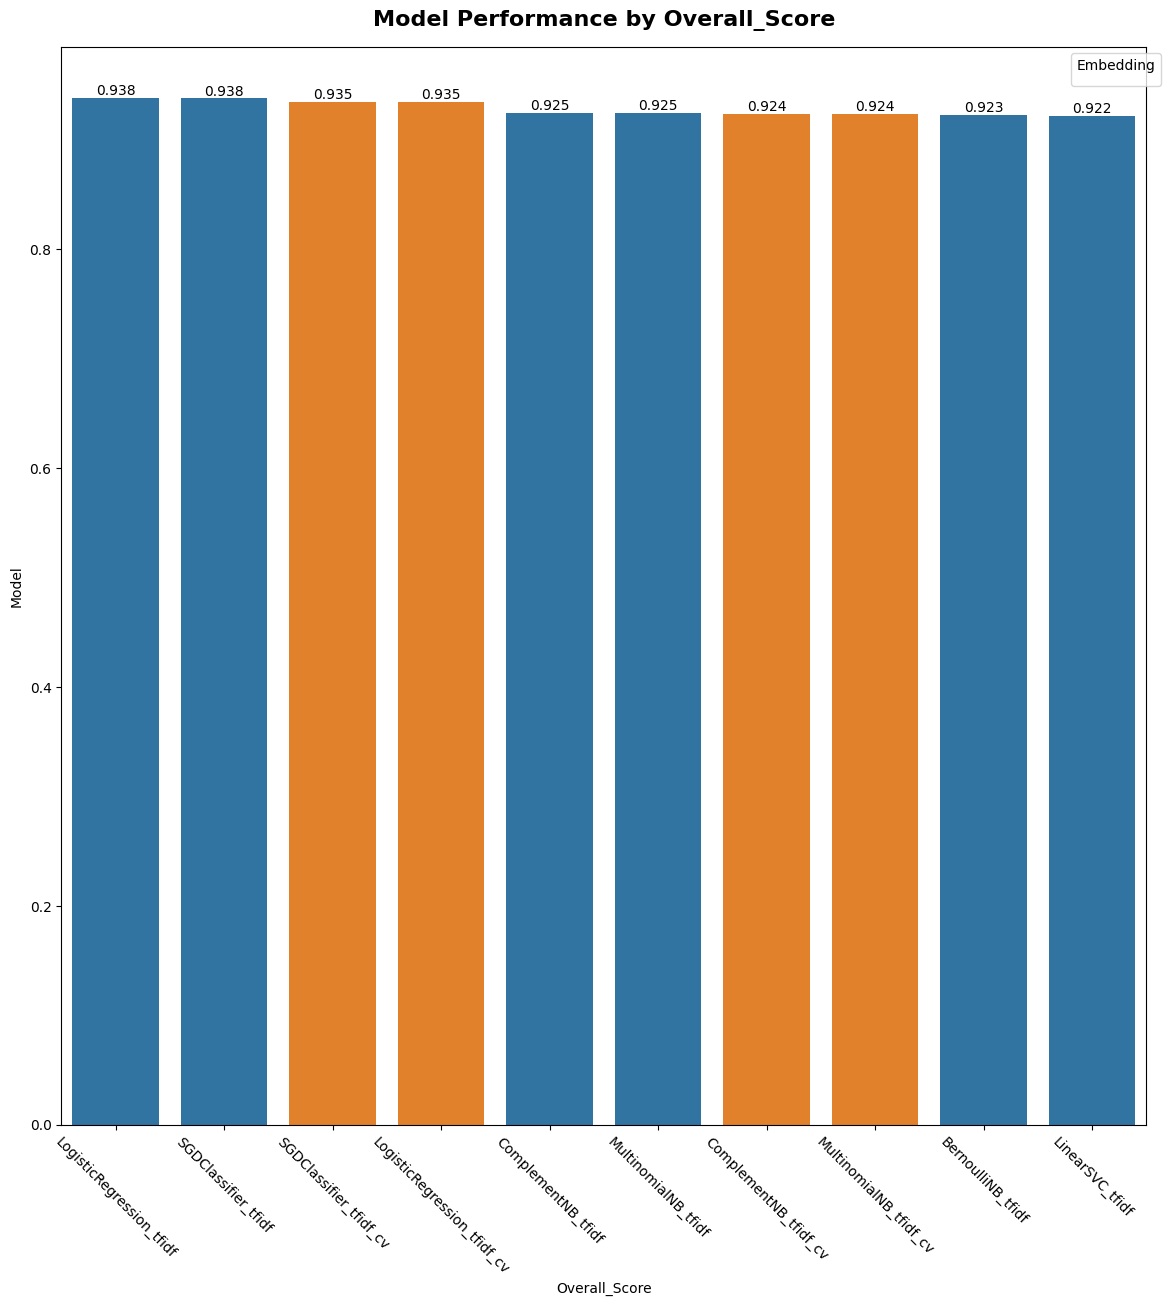

In [46]:
plot_model_performance(best_models, metric="Overall_Score", save_fig_path="../results/figures/model_performance_by_overall_score.png")

In [47]:
combined_models = combine_model_dicts(
    [
        df_model, df_cv_model,
        count_model, count_cv_model,
        tfidf_model, tfidf_cv_model,
        w2v_model, w2v_cv_model,
        ft_model, ft_cv_model
    ],
    names=[
        "_df", "_df_cv", 
        "_count", "_count_cv", 
        "_tfidf", "_tfidf_cv", 
        "_w2v", "_w2v_cv", 
        "_fast_text", "_fast_text_cv"
    ],
    prefix=False
)
save_pickle(combine_model_dicts, "../models/combined_models.pkl")
combined_models.keys()

dict_keys(['LogisticRegression_df', 'SGDClassifier_df', 'LinearSVC_df', 'MultinomialNB_df', 'ComplementNB_df', 'BernoulliNB_df', 'DecisionTreeClassifier_df', 'RandomForestClassifier_df', 'ExtraTreesClassifier_df', 'GradientBoostingClassifier_df', 'AdaBoostClassifier_df', 'MLPClassifier_df', 'LogisticRegression_df_cv', 'SGDClassifier_df_cv', 'LinearSVC_df_cv', 'MultinomialNB_df_cv', 'ComplementNB_df_cv', 'BernoulliNB_df_cv', 'DecisionTreeClassifier_df_cv', 'RandomForestClassifier_df_cv', 'ExtraTreesClassifier_df_cv', 'GradientBoostingClassifier_df_cv', 'AdaBoostClassifier_df_cv', 'MLPClassifier_df_cv', 'LogisticRegression_count', 'SGDClassifier_count', 'LinearSVC_count', 'MultinomialNB_count', 'ComplementNB_count', 'BernoulliNB_count', 'DecisionTreeClassifier_count', 'RandomForestClassifier_count', 'ExtraTreesClassifier_count', 'GradientBoostingClassifier_count', 'AdaBoostClassifier_count', 'MLPClassifier_count', 'LogisticRegression_count_cv', 'SGDClassifier_count_cv', 'LinearSVC_count_